#  Task 2: Prediction Using Unsupervised Machine Learning
This task is to predict the optimum number of clusters given an 'Iris' dataset using  KMeans Clustering method

## Steps:
1) Importing the dataset
2) Data Visualization
3) Finiding the optimum number of clusters
4) Apply the K Means Clustering
5) Visualize the clusters

#### Author: Hania Aly Elkhayat

# Step 1: Importing the dataset

In [50]:
# importing the needed libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [52]:
# reading the csv file
import os

path = os.path.join('d:' + os.sep, 'Hania', 'GRIP Data Science','Iris.csv')
dataset = pd.read_csv(path)

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#  Step 2: Data Visualization

In [53]:
# to know the number of rows and columns
dataset.shape

(150, 6)

In [54]:
# to know the column names
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [55]:
# to check what unique 'Species' we have
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
# more info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [57]:
# # to observe more statistical information as mean, standard deviation, min, max and percentiles
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [58]:
# we will drop label columns because it is unsupervised machine learning

# unsupervised machine learning algorithms deal with unlabelled raw data

iris = pd.DataFrame(dataset)
iris_dataset = iris.drop(columns = ['Species', 'Id'])

In [64]:
iris_dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


###### The data above consists of only 4 columns, the id column is generated only from the library when printing

# Step 3: Finding the optimum number of clusters
To cluster data using Kmeans, we have to know the best no of clusters to group our data upon. We will be using Elbow method for that

#### Elbow Method
The method consists of plotting the sum of squares at each number of clusters after being calculated and stored in a list 

Then, it's time to pick a point where a change of slope from steep to shallow (an elbow figure) is observed to determine the optimal number of clusters

###### For instance, by varying k from 1 to 10 clusters. For each k, calculate the total within-cluster sum of square (wss)

In [65]:
#calculating the total within-cluster sum of square (wss)

within_cluster_sum_of_square = []
clusters_range = range (1,11)

from sklearn.cluster import KMeans

for i in (clusters_range):
     km = KMeans(n_clusters = i)
     km = km.fit(iris_dataset)
     within_cluster_sum_of_square.append(km.inertia_)

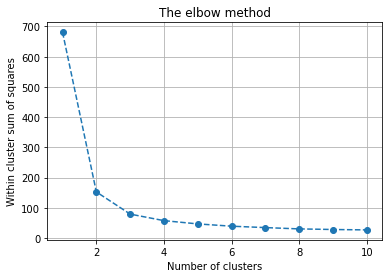

In [66]:
# Plotting the within-cluster sum of square (wss) against clusters range
# Why? to observe the elbow

plt.plot(clusters_range, within_cluster_sum_of_square, 'o--')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.grid()
plt.show()

###### As we can see, the optimum number of clusters is where the graph starts to have almost constant slope
This is when the 'within cluster sum of squares' doesn't decrease signifcantly with every iteration

### Therefore, the optimum number of clusters is 3

# Step 4: Apply the K-means clustering 

In [67]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans_predictions = model.fit_predict(iris_dataset)

# Step 5: Visualize the clusters

In [68]:
x = iris_dataset.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

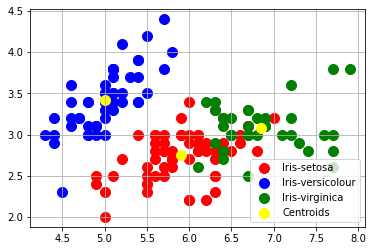

In [69]:
# Visualising the clusters - On the first two columns

x = iris_dataset.values

plt.scatter(x[y_kmeans_predictions == 0, 0], x[y_kmeans_predictions== 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans_predictions == 1, 0], x[y_kmeans_predictions== 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans_predictions == 2, 0], x[y_kmeans_predictions== 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.grid()